In [8]:
from scipy.sparse import csr_matrix, find
import numpy as np
import warnings
import pandas 
import numpy as np
from torch import tensor
import torch, numpy as np, pandas as pd
import torch.optim as optim
from collections import defaultdict
rowGeneExpression2 = defaultdict(dict)
import math
import torch
pandas.set_option('mode.use_inf_as_na', True)
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import os
os.environ["PYTHONWARNINGS"] = "ignore"
import scanpy as sc
from torch import tensor
import torch, numpy as np, pandas as pd
import torch.optim as optim
import torch.nn as nn
from torch import tensor
import torch, numpy as np, pandas as pd
import torch.optim as optim
from fastai.data.transforms import RandomSplitter
from collections import defaultdict
from scipy.sparse import csr_matrix, tril

import matplotlib.pyplot as plt
import numpy as np
from fastprogress.fastprogress import progress_bar
from fastprogress.fastprogress import master_bar 
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)
#one ='DatlingerBock2021.h5ad'
#one = 'AissaBenevolenskaya2021.h5ad'
#one = 'AissaBenevolenskaya2021.h5ad'
folders = '/home/awahab/llm-testing/data_sets/'
#one = 'AdamsonWeissman2016_GSM2406675_10X001.h5ad' #sigmoid returns nan in 0th frame
one ='DatlingerBock2017.h5ad'
one = 'AissaBenevolenskaya2021.h5ad'
one = 'SrivatsanTrapnell2020_sciplex2.h5ad'
one ='DatlingerBock2017.h5ad'
#one = 'AdamsonWeissman2016_GSM2406675_10X001.h5ad'
#one = 'AissaBenevolenskaya2021.h5ad'
#one = 'XieHon2017.h5ad'
#one = 'SrivatsanTrapnell2020_sciplex2.h5ad'
def readFiles():
    adata = sc.read_h5ad(folders + one)
    one ='DatlingerBock2017.h5ad'
    return adata
adata = sc.read_h5ad(folders + one)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, 
                                layer=None, 
                                n_top_genes=200, 
                                min_disp=0.5, 
                                max_disp=1, 
                                min_mean=0.0125, 
                                max_mean=3, 
                                span=0.3, 
                                n_bins=20, 
                                #flavor='seurat_v3', 
                                subset=False, 
                                inplace=True, 
                                batch_key=None, 
                                check_values=True)
sc.pp.pca(adata)
found = find(adata.X)
torch.manual_seed(440)
#adata.obs.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
#adata.obs = adata.iloc[:5000]
#adata.obs= adata.obs[adata.obs.iloc[:5000]]
#adata.obs.iloc[:5000]
#adata.var_names
var_df = adata.var
df = adata.obs#.iloc[:5000]
df = df.drop(columns=['nperts'])
df['percent_mito'] = 1
def getMode(l): 
    return max(set(l), key=l.count)
#sc.pp.filter_cells(adata, min_counts=None, min_genes=None, max_counts=None, max_genes=10, inplace=True, copy=False)
#sc.pp.filter_genes(adata, min_counts=None, min_cells=None, max_counts=None, max_cells=None, inplace=True, copy=False)
#sc.pp.highly_variable_genes(adata, layer=None, n_top_genes=None, min_disp=0.5, max_disp=inf, min_mean=0.0125, max_mean=3, span=0.3, n_bins=20, flavor='seurat', subset=False, inplace=True, batch_key=None, check_values=True)
#sc.pp.regress_out(adata, keys, n_jobs=None, copy=False)
#cell perturbation is defined as molecular response or gene expression that is different to what is "normal"
from IPython.display import IFrame
#check for expression values that are equal from crispr
#join with gene ontology
#this is a program
#input an adata file
#outputs a list of cell-IDs and the genes perturbed 
#and then what that gene does 
#and what interactions may occur with those perturbations 
from sklearn.preprocessing import LabelEncoder
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
#df['chembl-ID'] = label_encoder1.fit_transform(df['chembl-ID'])
df['perturbation_2'] = label_encoder1.fit_transform(df['perturbation_2'])
df['target_2'] = label_encoder2.fit_transform(df['target'])
cool_columns = 'ncounts ngenes percent_mito percent_ribo'.split(' ')
for key in cool_columns:
    ct = adata.obs[adata.obs['perturbation'] == 'control'][key].std()
    pt = adata.obs[adata.obs['perturbation'] != 'control'][key].std()
    print(key, '      ctrl =   ', ct, '   pert = ', pt)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#https://github.com/scipy/scipy/blob/v1.11.2/scipy/sparse/_compressed.py#L1158-L1165

ncounts       ctrl =    7085.9976    pert =  7251.1616
ngenes       ctrl =    1460.5028512358208    pert =  1472.5600646518021
percent_mito       ctrl =    2.642741    pert =  2.799472
percent_ribo       ctrl =    3.813907    pert =  3.8422022


In [9]:
from torch import tensor
import torch, numpy as np, pandas as pd
import torch.optim as optim

from fastai.data.transforms import RandomSplitter
from collections import defaultdict

numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].fillna(0)
numerical_values = df.select_dtypes(include=[int, float]).values.tolist()
numerical_values
rowGeneExpression = defaultdict(int)
hv_genes = set(list(var_df[var_df['highly_variable'] == True].index))
normal_genes = (list(adata.var_names))
high_variance_columns = set([ i for i,val in enumerate(normal_genes) if val in hv_genes ])
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].fillna(0)
sums = []
column_averages = defaultdict(list)
rowGeneExpression = defaultdict(int)
rows, columns, vals = found
high_variance = set(high_variance_columns)
row_id = 0
control_variables = set(['ctrl', 'control', '*'])
dependent_variables = list(df['perturbation'].map(lambda val: 0 if val in control_variables else 1).values)
geneValues = defaultdict(int)
columnMode = defaultdict(list)
geneAverages = defaultdict(int)
geneOccurences = defaultdict(int)
geneVariance = defaultdict(list)
cell_variance_score = defaultdict(int)

row_variance = [] 
c,g,v = found

cell_variance_score = {}
for i in range(df.shape[0]): cell_variance_score[i]= 0

for cell,gene,val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    geneValues[gene] += val
    geneOccurences[gene] += 1
    columnMode[gene].append(val)
    
for k in dict(geneValues):
    geneAverages[k] =  geneValues[k] / geneOccurences[k]
    
for k in dict(geneValues): columnMode[k] = getMode(columnMode[k])
    
for cell, gene, val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    geneVariance[gene].append(abs(val - geneAverages[gene]))# ** 2
    
    
for k in dict(geneAverages):  
    geneVariance[k] = max(set(geneVariance[k]), key=geneVariance[k].count)

geneModes = defaultdict(list)

for cell, gene, val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    geneModes[gene].append(abs(val))# ** 2

for val in geneModes: geneModes[val] = max(set(geneModes[val]), key=geneModes[val].count)

num_cells = len(df.select_dtypes(include=[int, float]).values.tolist())
    
mini_cell_var = defaultdict(list)
for cell, gene, val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    columnColor = geneAverages[gene]
    cellColorForGene = val
    threshold = columnColor
    if (cellColorForGene - columnColor) < 0:
        mini_cell_var[cell].append(cellColorForGene - columnColor)
        cell_variance_score[cell] += abs(cellColorForGene - columnColor)
      
for key in mini_cell_var: mini_cell_var[key] = max(mini_cell_var[key])
        
df['geneVarianceScore'] = cell_variance_score.values()
numerical_values = df.select_dtypes(include=[int, float]).values.tolist()
independent_variables = pd.DataFrame(numerical_values)

vals += .01
t_dep = tensor([float(i) for i in dependent_variables]) # pertrubations
t_indep = tensor(numerical_values, dtype=torch.float)

n_coeff = t_indep.shape[1]

vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals
trn_split,val_split=RandomSplitter(seed=42)(independent_variables)

trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]

indep_cols =  df.select_dtypes(include=[int, float]).columns.tolist()
indep_cols

len([item for item in list(t_dep) if item.item() == 0])
len([item for item in list(t_dep) if item.item() > .5]) 

4585

In [10]:
cell_variance_score= defaultdict(int)
for cell, gene, val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    columnColor = geneAverages[gene]
    cellColorForGene = val
    threshold = columnColor
    if abs(cellColorForGene) > columnColor and columnColor < 1:
        #mini_cell_var[cell].append(cellColorForGene - columnColor)
        cell_variance_score[cell] += abs(cellColorForGene - columnColor)
l = cell_variance_score.values()   
avg = sum(l) / len(l)
avg = 0
import random
cvs = cell_variance_score.values()
mini_cell_var.values()
total_guess = len([item for key, item in enumerate(cvs) if item > avg])
correct_guess = len([item for key, item in enumerate(cvs) if item > avg and dependent_variables[key] == 1])
perb_total =  len([item for key, item in enumerate(dependent_variables) if dependent_variables[key] == 1])
print(f'correct{correct_guess}, total_guess{total_guess}, perb_total {perb_total}, accuracy {correct_guess / total_guess}')
print(f'precision {total_guess / perb_total}')

correct2004, total_guess2567, perb_total 4585, accuracy 0.7806778340475263
precision 0.5598691384950927


In [11]:
count = []
test = defaultdict(int)
for i in high_variance_columns:
    m=adata.X.getcol(i).todense()
    mode = getMode(m.tolist()[0]) 
    avg = sum(m.tolist()[0]) / len(m.tolist()[0])
    pert_and_above_zero = len([i for k, i in enumerate(m.tolist()) if i[0] > 0 and dependent_variables[k] > 0])
    not_pert_and_above_zero = len([i for k, i in enumerate(m.tolist()) if i[0] > 0 and dependent_variables[k] < 1])
    above_zero = len([i for k, i in enumerate(m.tolist()) if i[0] > 0])
    eq_zero = len([i for k, i in enumerate(m.tolist()) if i[0] == 0])
    test[i] = above_zero
    cellCounts = 5904
    if (above_zero > 30): continue # 90%
    for key,element in enumerate(m.tolist()):
        if element[0] > 0: count.append(key)
print(len(set(count)))
count = set(count)
print(len([x for row, x in enumerate(count) if dependent_variables[x] > 0]),len([x for row, x in enumerate(count) if dependent_variables[x] < 1]))
print(len([x for row, x in enumerate(count) if dependent_variables[x] > 0]) / len([x for row, x in enumerate(count)]))

608
541 67
0.8898026315789473


In [12]:
category_indices = df.groupby('perturbation').apply(lambda x: x.index.tolist() )
most_cells = category_indices[2]

most_cell_indices = []
for i in most_cells:
    most_cell_indices.append(adata.obs.index.get_loc(i))

a=most_cell_indices[0]
b=most_cell_indices[10]

b_matrix = adata.X.getrow(b).todense().tolist()[0]
a_matrix = adata.X.getrow(a).todense().tolist()[0]

a_matrix
print(len(most_cells))
sum(a_matrix), sum(b_matrix)
count = {}
        
distance = defaultdict(int)
indicesAbove = defaultdict(list)

for row in range(5904):
    m = adata.X.getrow(row).todense().tolist()[0]
    for k in high_variance_columns:
        if (geneAverages[k]) < m[k] and m[k] < 100:
            distance[k] += m[k]
            indicesAbove[row].append(k)
            
distance_max = max(list(distance.values()))

for k in distance:
    if distance[k] == distance_max: print(k)

13
15986


In [13]:
#### scipy.stats.zscore(adata.X.getcol(0).todense().tolist())
indicesAbove = dict(indicesAbove)
# for cell,gene,val in zip(c,g,v):
#     if gene not in high_variance_columns: continue
#     geneValues[gene] += val
#     geneOccurences[gene] += 1
#     columnMode[gene].append(val)

timesAbove = defaultdict(int)
geneAboveMeanOccurances = defaultdict(list)

for row in dict(indicesAbove): 
    for column in indicesAbove[row]: 
        geneAboveMeanOccurances[column].append(row)
        
prob_perts = {} 

filteredGeneCellLists = defaultdict(list)

threshold = 30

for geneList in geneAboveMeanOccurances:
    cellsWithGene = geneAboveMeanOccurances[geneList]
    if  threshold < len(cellsWithGene) and len(cellsWithGene) < 100:
        filteredGeneCellLists[geneList] = cellsWithGene

cellToGeneEmbedding = [[] for i in range(5904)]

for column in filteredGeneCellLists:
    cellList = filteredGeneCellLists[column]
    for cellRow in cellList:
        cellToGeneEmbedding[cellRow].append(column)
    
cellToGeneEmbedding

cellCount = 0
for cellList in list(filteredGeneCellLists.values()):
    cellCount += len(cellList)
    
totalCells = []
for key in (filteredGeneCellLists.keys()):
    cellList = filteredGeneCellLists[key]
    totalCells += cellList
    for cell in cellList:
        gene = adata.var.iloc[cell].name
        row = df.iloc[cell]
        
len(set(totalCells))

len([item for key, item in enumerate(t_dep) if item.item() > .5 and key in totalCells])
total = defaultdict(int)
for row in range(500):
    total[row] += sum(adata.X.getrow(row).data)
avg = sum(list(total.values())) / 500

counter = 0
for key, item in enumerate(list(total.values())):
    if item > avg:
        counter += 1
        
counter
count_per_category = df.groupby('perturbation').size()

In [14]:
dev = 'cuda:0'
def test_prediction(test_predictions):
    ctrl = test_predictions.sum(1).tolist()[0]
    isFalse = len([sum(row) for idx, row in enumerate(test_predictions.tolist()) if sum(row) <= ctrl and t_dep[idx] == 0])
    isTrue = len([sum(row) for idx, row in enumerate(test_predictions.tolist()) if sum(row) > ctrl and t_dep[idx] == 1])
    allFalse = len([sum(row) for idx, row in enumerate(test_predictions.tolist()) if t_dep[idx] == 0])
    allTrue = len([sum(row) for idx, row in enumerate(test_predictions.tolist()) if t_dep[idx] == 1])
    return (isFalse / allFalse, isTrue / allTrue, isFalse, isTrue)
def plot_loss(l):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20, 4))
    legends = []
    plt.plot(l) 
    plt.plot([0, len([i for k,i in enumerate(rowGeneExpression.values()) if dependent_variables[k]])], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
    plt.legend(legends);

numerical_values = df.select_dtypes(include=[int, float]).values.tolist()
t_indep = torch.Tensor(numerical_values).to(dev)
# t_indep = t_indep / vals
# λλλλλ.requires_grad_(True)
#3 variations, test, t_indep and t_indep+embedding
resultant_tensor = t_indep
encodedOutput.requires_grad_(True)
#resultant_tensor = torch.cat((t_indep.to(dev),tensor.to(dev)), 1)
#resultant_tensor = λλλλλ
#resultant_tensor = tensor
vals, indices = resultant_tensor.max(dim=0)
resultant_tensor = resultant_tensor / vals
resultant_tensor = resultant_tensor.to(dev)
test_indep = torch.tensor([[t_dep[k].item() for i in enumerate(range(resultant_tensor.shape[1]))] for k, i in enumerate(range(resultant_tensor.shape[0]))])
dim = resultant_tensor.shape[1]

model = torch.nn.Sequential(
    torch.nn.Linear(dim,dim),
    nn.ReLU(),
    nn.Linear(dim,dim),
    nn.ReLU(),
    nn.Linear(dim, dim),
    nn.Sigmoid()
).to(dev)

optimizer = torch.optim.SGD(
    model.parameters(), 
    lr=.1, 
    weight_decay=0.01
)
# model = model.to(device)
# input_tensor = input_tensor.to(device)

n_iterations = 1000
loss_track = []
accuracy_track = []
no_entropy = []
loss_function = torch.nn.BCELoss()
def plot_loss_update(epoch, epochs, mb, train_loss, valid_loss):
    """ dynamically print the loss plot during the training/validation loop.
        expects epoch to start from 1.
    """
    x = range(1, epoch+1)
    y = np.concatenate((train_loss, valid_loss))
    graphs = [[x,train_loss], [x,valid_loss]]
    x_margin = 0.2
    y_margin = 0.05
    x_bounds = [1-x_margin, epochs+x_margin]
    y_bounds = [np.min(y)-y_margin, np.max(y)+y_margin]

    mb.update_graph(graphs, x_bounds, y_bounds)
mb = master_bar(range(1))
def plot_loss_update(epoch, epochs, mb, train_loss, valid_loss):
    """ dynamically print the loss plot during the training/validation loop.
        expects epoch to start from 1.
    """
    x = range(1, epoch+1)
    y = np.concatenate((train_loss, valid_loss))
    print(x,y)
    graphs = [[x,train_loss], [x,valid_loss]]
    x_margin = 0.2
    y_margin = 0.05
    x_bounds = [1-x_margin, epochs+x_margin]
    y_bounds = [np.min(y)-y_margin, np.max(y)+y_margin]
    print(x_bounds, y_bounds)
    mb.update_graph(graphs, x_bounds, y_bounds)

for i in mb:    
#for j in progress_bar(range(2000), parent=mb):
    for j in progress_bar(range(2000)):
        loss = loss_function(model(resultant_tensor).sum(1).sigmoid(), t_dep.to(dev))
        optimizer.zero_grad()  # 3
        loss.backward(retain_graph=True)  # 4
        optimizer.step()  # 5
        if j == 1 or j % 50 == 0:
            test_predictions = model(resultant_tensor)
            #print(loss.item(), test_predictions.sum().item() / 8)
            print(test_prediction(test_predictions))
        loss_track.append(loss.item())
        accuracy_track.append(test_predictions.sum().item() / 8)
        #no_entropy += [test_predictions.sum().item() / 8]
        #         k = 100 * i + j
        #         x = np.arange(0, 2*k*np.pi/1000, 0.01)
        #         y1, y2 = np.cos(x), np.sin(x)
        #         graphs = [[x,y1], [x,y2]]
        #         x_bounds = [0, 2*np.pi]
        #         y_bounds = [-1,1]
        #         mb.update_graph(graphs, x_bounds, y_bounds)
        #         print(loss_track, accuracy_track)
        #print(loss_track, accuracy_track)
        #plot_loss_update(j, n_iterations, mb, loss_track, accuracy_track)
        #for batch in progress_bar(range(2), parent=mb): sleep(0.2)

NameError: name 'encodedOutput' is not defined

In [ ]:
count = 0
cont_keys = {}
for key in filteredGeneCellLists:
    cont_keys[key] = count
    count += 1
continuousFilteredGeneCellLists = {}
for k in list(filteredGeneCellLists.keys()):
    continuousFilteredGeneCellLists[cont_keys[k]] = filteredGeneCellLists[k]
#continuousFilteredGeneCellLists
#cont_keys
#len(list(continuousFilteredGeneCellLists.keys()))
#cellCountWithinGroup
#zscore
#continuousFilteredGeneCellLists check
# x = cells in group(s) , cellCountWithinGroup
# y = genes affected 
# z = cluster number
#for each cell
#make a graph -> 
#negative * negative = positive, 
#x  cluster "name" or index (clusters should change)
#y = genes above/below threshold 
#z = total dist above threshold
#convert 200 dimensions to 3
cellGroups = [0 for i in list(range(5905))]
cellGroupLengths = [0 for i in list(range(5905))]
cellDistCounts = [0 for i in list(range(5905))]
for column in continuousFilteredGeneCellLists:
    for cell in continuousFilteredGeneCellLists[column]:
        cellGroups[cell] = column
        cellGroupLengths[cell] = len(continuousFilteredGeneCellLists[column])
for idx, row in enumerate(mat_for_embed):
    for val in row: 
        cellDistCounts[idx] += val
        
#cellDistCounts
#https://en.wikipedia.org/wiki/Foundation%27s_Edge

In [6]:
# find gradient of row
#given two rows that belong to same perturbation -> return identical or similar values
#given a matrix -> return mx5 vals that can be transformed into a p-val
#capture the 'features' that can be used to reconstruct -> molecular response
# find the molecular response of each phenotype interaction or simply the gene by itself
#gradient ascent -> descent -> find distributions -> sparsify them
#ring that captures relevant known info about you and stores it cryptographically 
#given n rows and a matrix -> return a tuple that can be used to identify rows which belong to a perturbation response
#given an expression matrix -> group cells by perturbation profiles
#transcriptomics, genomics, proteinomics, metabolomics
#recorded actions -> comic generator
#script -> comic generator
#comic -> animation generator
#$https://www.youtube.com/watch?v=DzNmUNvnB04
#plot the matrix before + after - 200x6k to 3x6k -> bright colors for rows with perturbations 
#perturbations defined as belonging to a group of rows that have multiple columns that are covarying from mean-zscore
#makeCoolStuff = [[float(k) for k in range(5905)] for i in range(200)]
#https://explained.ai/regularization/index.html
#oft constraint with non-regularized loss function (blue-red) term and penalty term (orange).
#invent a new architecture 
#that captures probability of perturbation across a matrix
#https://www.10xgenomics.com/resources/datasets/5-k-a-549-lung-carcinoma-cells-no-treatment-transduced-with-a-crispr-pool-3-1-standard-6-0-0
# all_url = [
# #     "https://zenodo.org/record/7416068/files/AdamsonWeissman2016_GSM2406675_10X001.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/AdamsonWeissman2016_GSM2406677_10X005.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/AdamsonWeissman2016_GSM2406681_10X010.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/AissaBenevolenskaya2021.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/ChangYe2021.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/DatlingerBock2017.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/DatlingerBock2021.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/DixitRegev2016.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/FrangiehIzar2021_protein.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/FrangiehIzar2021_RNA.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/GasperiniShendure2019_atscale.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/GasperiniShendure2019_highMOI.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/GasperiniShendure2019_lowMOI.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/GehringPachter2019.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/McFarlandTsherniak2020.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/NormanWeissman2019_filtered.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/PapalexiSatija2021_eccite_arrayed_protein.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/PapalexiSatija2021_eccite_arrayed_RNA.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/PapalexiSatija2021_eccite_protein.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/PapalexiSatija2021_eccite_RNA.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ReplogleWeissman2022_K562_essential.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ReplogleWeissman2022_K562_gwps.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ReplogleWeissman2022_rpe1.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SchiebingerLander2019_GSE106340.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SchiebingerLander2019_GSE115943.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SchraivogelSteinmetz2020_TAP_SCREEN__chromosome_11_screen.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SchraivogelSteinmetz2020_TAP_SCREEN__chromosome_8_screen.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ShifrutMarson2018.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SrivatsanTrapnell2020_sciplex2.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SrivatsanTrapnell2020_sciplex3.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SrivatsanTrapnell2020_sciplex4.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/TianKampmann2019_day7neuron.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/TianKampmann2019_iPSC.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/TianKampmann2021_CRISPRa.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/TianKampmann2021_CRISPRi.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/WeinrebKlein2020.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/XieHon2017.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ZhaoSims2021.h5ad?download=1"
# ]
#scarches.dataset.remove_sparsity(adata)
#https://docs.scarches.org/en/latest/api/models.html
# mdata = muon.read_10x_h5("pbmc_10k_protein_v3_filtered_feature_bc_matrix.h5")
# scvi.model.TOTALVI.setup_mudata(mdata, modalities={"rna_layer": "rna": "protein_layer": "prot"})
# vae = scvi.model.TOTALVI(mdata)
#https://docs.scvi-tools.org/en/stable/api/reference/scvi.module.LDVAE.html
#[i for i in test_predictions.tolist() if i < 1]
# Regularization in Logistic Regression
# Regularization is extremely important in logistic regression modeling. Without regularization, the asymptotic nature of logistic regression would keep driving loss towards 0 in high dimensions. Consequently, most logistic regression models use one of the following two strategies to dampen model complexity:
# L2 regularization.
# Early stopping, that is, limiting the number of training steps or the learning rate.
# (We'll discuss a third strategy—L1 regularization—in a later module.)
# Imagine that you assign a unique id to each example, and map each id to its own feature. If you don't specify a regularization function, the model will become completely overfit. That's because the model would try to drive loss to zero on all examples and never get there, driving the weights for each indicator feature to +infinity or -infinity. This can happen in high dimensional data with feature crosses, when there’s a huge mass of rare crosses that happen only on one example each.
# Fortunately, using L2 or early stopping will prevent this problem.
#[ x for x in [iden(sum(item), 10)  for item in test_predictions.tolist()] if x > .1]
#plot(loss_track)
#make demo = good

def plot_loss(l):
    plt.figure(figsize=(20, 4))
    legends = []
#     blue = [i for k,i in enumerate(rowGeneExpression.values()) if dependent_variables[k]]
#     oj =[i for k,i in enumerate(rowGeneExpression.values()) if not dependent_variables[k]]
#     blue.sort()
#     oj.sort()
#     plt.plot((blue)) #blue true peturbation 
    plt.plot(l) #orange false ctrl
    #legends.append('param %d' % i)
    plt.plot([0, len([i for k,i in enumerate(rowGeneExpression.values()) if dependent_variables[k]])], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
    plt.legend(legends);
# #https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02021-3
# # Medicine Finding anomalies in radiology images, including CT, MRI, and X-ray images; counting features in pathology slides; measuring features in ultrasounds; diagnosing diabetic retinopathy
# #Biology Folding proteins; classifying proteins; many genomics tasks, such as tumor-normal sequencing and classifying clinically actionable genetic mutations; cell classification; analyzing protein/protein interactions
# #Other applications Financial and logistical forecasting, text to speech, and much more…
# # humor analysis - larry david vs seinfeld ? 
#https://www.kaggle.com/code/jhoward/why-you-should-use-a-framework
#handle "values outside of domain" by "SVM"
#random forest classifier
#logisitc regression - hard to get right
#correct transformations, outlier handling, correct interactions
#os.listdir('./data_sets')
#wget -m http://www.example.com 2>&1 | grep '^--' | awk '{ print $3 }' | grep -v '\.\(css\|js\|png\|gif\|jpg\|JPG\)$' > urls.txt
#https://academic.oup.com/bib/article/22/4/bbaa268/5943793
#plot(loss_track)
#https://terrytao.files.wordpress.com/2011/02/matrix-book.pdf
#https://academic.oup.com/bioinformatics/article/36/Supplement_2/i610/6055927?login=false

In [8]:
# #sc.pl.StackedViolin(adata, , groupby='', use_raw=None, log=False, num_categories=7, categories_order=None, title=None, figsize=None, gene_symbols=None, var_group_positions=None, var_group_labels=None, var_group_rotation=None, layer=None, standard_scale=None, ax=None, vmin=None, vmax=None, vcenter=None, norm=None)
# sc.pl.StackedViolin(adata, list(hv_genes), groupby='perturbation', dendrogram=True).show()
# hg = list(hv_genes)[100:]
# sc.pl.DotPlot(adata, hg,  groupby='perturbation').show()
# sc.pl.MatrixPlot(adata, hg, groupby='perturbation').show()
# first = adata.X.A[:100]
# second = adata.X.T.A[:100]
# perturbations = []
# for key, row in enumerate(first):
#     trackPerts = []
#     for column in row:
#         if column > 0: trackPerts.append(column)
#     print(t_dep[key].item(), len(trackPerts))
#https://datahacker.rs/003-gans-autoencoder-implemented-with-pytorch/
#https://blog.paperspace.com/adversarial-autoencoders-with-pytorch/
#https://www.cs.toronto.edu/~larocheh/publications/icml-2008-denoising-autoencoders.pdf
#https://www.cs.utoronto.ca/~hinton/absps/cogscibm.pdf
#Pascal Vincent, Hugo Larochelle, Yoshua Bengio, and
# Pierre-Antoine Manzagol. 2008. Extracting and
# composing robust features with denoising autoencoders. In Proceedings of the 25th international
# conference on Machine learning, pages 1096–1103.
# ACM.
#https://github.com/fastai/course22p2/blob/master/nbs/08_autoencoder.ipynb
#file:///Users/adnanwahab/Downloads/Molecular%20Systems%20Biology%20-%202016%20-%20Angermueller.pdf
#https://www.cell.com/patterns/pdf/S2666-3899(21)00001-5.pdf
#https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter3_MCMC/Ch3_IntroMCMC_PyMC3.ipynb
##https://www.genome.gov/research-funding/Funded-Programs-Projects/Multi-Omics-for-Health-and-Disease
#IFrame('https://www.shadertoy.com/embed/dlScDy?gui=true&t=10&paused=true&muted=false', width=700, height=350)
#https://github.com/AntixK/PyTorch-VAE/blob/master/models/lvae.py
# from torchvision.datasets import CIFAR10
# import os
# import urllib.request
# from urllib.error import HTTPError

# import lightning as L
# import matplotlib
# import matplotlib.pyplot as plt
# import matplotlib_inline.backend_inline
# import seaborn as sns
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# import torch.utils.data as data
# import torchvision
# from lightning.pytorch.callbacks import Callback, LearningRateMonitor, ModelCheckpoint
# from torch.utils.tensorboard import SummaryWriter
# from torchvision import transforms
# from torchvision.datasets import CIFAR10
# from tqdm.notebook import tqdm
# model_dict = {}

# class GenerateCallback(Callback):
#     def __init__(self, input_imgs, every_n_epochs=1):
#         super().__init__()
#         self.input_imgs = input_imgs  # Images to reconstruct during training
#         # Only save those images every N epochs (otherwise tensorboard gets quite large)
#         self.every_n_epochs = every_n_epochs

#     def on_train_epoch_end(self, trainer, pl_module):
#         if trainer.current_epoch % self.every_n_epochs == 0:
#             # Reconstruct images
#             input_imgs = self.input_imgs.to(pl_module.device)
#             with torch.no_grad():
#                 pl_module.eval()
#                 reconst_imgs = pl_module(input_imgs)
#                 pl_module.train()
#             # Plot and add to tensorboard
#             imgs = torch.stack([input_imgs, reconst_imgs], dim=1).flatten(0, 1)
#             grid = torchvision.utils.make_grid(imgs, nrow=2, normalize=True, range=(-1, 1))
#             trainer.logger.experiment.add_image("Reconstructions", grid, global_step=trainer.global_step)    
    
# def train_cifar(latent_dim):
#     # Create a PyTorch Lightning trainer with the generation callback
#     trainer = L.Trainer(
#         default_root_dir=os.path.join(CHECKPOINT_PATH, "cifar10_%i" % latent_dim),
#         accelerator="auto",
#         devices=1,
#         max_epochs=500,
#         callbacks=[
#             ModelCheckpoint(save_weights_only=True),
#             GenerateCallback(get_train_images(8), every_n_epochs=10),
#             LearningRateMonitor("epoch"),
#         ],
#     )
#     trainer.logger._log_graph = True  # If True, we plot the computation graph in tensorboard
#     trainer.logger._default_hp_metric = None  # Optional logging argument that we don't need

#     # Check whether pretrained model exists. If yes, load it and skip training
#     pretrained_filename = os.path.join(CHECKPOINT_PATH, "cifar10_%i.ckpt" % latent_dim)
#     if os.path.isfile(pretrained_filename):
#         print("Found pretrained model, loading...")
#         model = Autoencoder.load_from_checkpoint(pretrained_filename)
#     else:
#         model = Autoencoder(base_channel_size=32, latent_dim=latent_dim)
#         trainer.fit(model, train_loader, val_loader)
#     # Test best model on validation and test set
#     val_result = trainer.test(model, dataloaders=val_loader, verbose=False)
#     test_result = trainer.test(model, dataloaders=test_loader, verbose=False)
#     result = {"test": test_result, "val": val_result}
#     return model, result


# class Decoder(nn.Module):
#     def __init__(self, num_input_channels: int, base_channel_size: int, latent_dim: int, act_fn: object = nn.GELU):
#         """
#         Args:
#            num_input_channels : Number of channels of the image to reconstruct. For CIFAR, this parameter is 3
#            base_channel_size : Number of channels we use in the last convolutional layers. Early layers might use a duplicate of it.
#            latent_dim : Dimensionality of latent representation z
#            act_fn : Activation function used throughout the decoder network
#         """
#         super().__init__()
#         c_hid = base_channel_size
#         self.linear = nn.Sequential(nn.Linear(latent_dim, 2 * 16 * c_hid), act_fn())
#         self.net = nn.Sequential(
#             nn.ConvTranspose2d(
#                 2 * c_hid, 2 * c_hid, kernel_size=3, output_padding=1, padding=1, stride=2
#             ),  # 4x4 => 8x8
#             act_fn(),
#             nn.Conv2d(2 * c_hid, 2 * c_hid, kernel_size=3, padding=1),
#             act_fn(),
#             nn.ConvTranspose2d(2 * c_hid, c_hid, kernel_size=3, output_padding=1, padding=1, stride=2),  # 8x8 => 16x16
#             act_fn(),
#             nn.Conv2d(c_hid, c_hid, kernel_size=3, padding=1),
#             act_fn(),
#             nn.ConvTranspose2d(
#                 c_hid, num_input_channels, kernel_size=3, output_padding=1, padding=1, stride=2
#             ),  # 16x16 => 32x32
#             nn.Tanh(),  # The input images is scaled between -1 and 1, hence the output has to be bounded as well
#         )

#     def forward(self, x):
#         x = self.linear(x)
#         x = x.reshape(x.shape[0], -1, 4, 4)
#         x = self.net(x)
#         return x    
    
# class Autoencoder(L.LightningModule):
#     def __init__(
#         self,
#         base_channel_size: int,
#         latent_dim: int,
#         encoder_class: object = Encoder,
#         decoder_class: object = Decoder,
#         num_input_channels: int = 3,
#         width: int = 32,
#         height: int = 32,
#     ):
#         super().__init__()
#         # Saving hyperparameters of autoencoder
#         self.save_hyperparameters()
#         # Creating encoder and decoder
#         self.encoder = encoder_class(num_input_channels, base_channel_size, latent_dim)
#         self.decoder = decoder_class(num_input_channels, base_channel_size, latent_dim)
#         # Example input array needed for visualizing the graph of the network
#         self.example_input_array = torch.zeros(2, num_input_channels, width, height)

#     def forward(self, x):
#         """The forward function takes in an image and returns the reconstructed image."""
#         z = self.encoder(x)
#         x_hat = self.decoder(z)
#         return x_hat

#     def _get_reconstruction_loss(self, batch):
#         """Given a batch of images, this function returns the reconstruction loss (MSE in our case)"""
#         x, _ = batch  # We do not need the labels
#         x_hat = self.forward(x)
#         loss = F.mse_loss(x, x_hat, reduction="none")
#         loss = loss.sum(dim=[1, 2, 3]).mean(dim=[0])
#         return loss

#     def configure_optimizers(self):
#         optimizer = optim.Adam(self.parameters(), lr=1e-3)
#         # Using a scheduler is optional but can be helpful.
#         # The scheduler reduces the LR if the validation performance hasn't improved for the last N epochs
#         scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.2, patience=20, min_lr=5e-5)
#         return {"optimizer": optimizer, "lr_scheduler": scheduler, "monitor": "val_loss"}

#     def training_step(self, batch, batch_idx):
#         loss = self._get_reconstruction_loss(batch)
#         self.log("train_loss", loss)
#         return loss

#     def validation_step(self, batch, batch_idx):
#         loss = self._get_reconstruction_loss(batch)
#         self.log("val_loss", loss)

#     def test_step(self, batch, batch_idx):
#         loss = self._get_reconstruction_loss(batch)
#         self.log("test_loss", loss)


# from torchvision import transforms
# #%matplotlib inline
# #matplotlib_inline.backend_inline.set_matplotlib_formats("svg", "pdf")  # For export
# #matplotlib.rcParams["lines.linewidth"] = 2.0
# sns.reset_orig()
# sns.set()

# # Tensorboard extension (for visualization purposes later)

# # Path to the folder where the datasets are/should be downloaded (e.g. CIFAR10)
# DATASET_PATH = os.environ.get("PATH_DATASETS", "data")
# # Path to the folder where the pretrained models are saved
# CHECKPOINT_PATH = os.environ.get("PATH_CHECKPOINT", "saved_models/tutorial9")

# # Setting the seed
# L.seed_everything(42)

# # Ensure that all operations are deterministic on GPU (if used) for reproducibility
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

# device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
# print("Device:", device)
# #model = Autoencoder(base_channel_size=32, latent_dim=latent_dim)

# m = Encoder(200, 50, 10)
# #m(data)
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# # Loading the training dataset. We need to split it into a training and validation part
# # train_dataset = CIFAR10(root=DATASET_PATH, train=True, transform=transform, download=True)
# # L.seed_everything(42)
# # train_set, val_set = torch.utils.data.random_split(train_dataset, [45000, 5000])

# # # Loading the test set
# # test_set = CIFAR10(root=DATASET_PATH, train=False, transform=transform, download=True)

# # # We define a set of data loaders that we can use for various purposes later.
# # train_loader = data.DataLoader(train_set, batch_size=256, shuffle=True, drop_last=True, pin_memory=True, num_workers=4)
# # val_loader = data.DataLoader(val_set, batch_size=256, shuffle=False, drop_last=False, num_workers=4)
# # test_loader = data.DataLoader(test_set, batch_size=256, shuffle=False, drop_last=False, num_workers=4)


# def get_train_images(num):
#     return torch.stack([train_dataset[i][0] for i in range(num)], dim=0)
# base_url = "https://raw.githubusercontent.com/phlippe/saved_models/main/tutorial9/"
# # Files to download
# pretrained_files = ["cifar10_64.ckpt", "cifar10_128.ckpt", "cifar10_256.ckpt", "cifar10_384.ckpt"]
# # Create checkpoint path if it doesn't exist yet
# os.makedirs(CHECKPOINT_PATH, exist_ok=True)

# # For each file, check whether it already exists. If not, try downloading it.
# # for file_name in pretrained_files:
# #     file_path = os.path.join(CHECKPOINT_PATH, file_name)
# #     if not os.path.isfile(file_path):
# #         file_url = base_url + file_name
# #         print("Downloading %s..." % file_url)
# #         try:
# #             urllib.request.urlretrieve(file_url, file_path)
# #         except HTTPError as e:
# #             print(
# #                 "Something went wrong. Please try to download the files manually,"
# #                 " or contact the author with the full output including the following error:\n",
# #                 e,
# #             )
# def visualize_reconstructions(model, input_imgs):
#     # Reconstruct images
#     model.eval()
#     with torch.no_grad():
#         reconst_imgs = model(input_imgs.to(model.device))
#     reconst_imgs = reconst_imgs.cpu()

#     # Plotting
#     imgs = torch.stack([input_imgs, reconst_imgs], dim=1).flatten(0, 1)
#     grid = torchvision.utils.make_grid(imgs, nrow=4, normalize=True, range=(-1, 1))
#     grid = grid.permute(1, 2, 0)
#     plt.figure(figsize=(7, 4.5))
#     plt.title("Reconstructed from %i latents" % (model.hparams.latent_dim))
#     plt.imshow(grid)
#     plt.axis("off")
#     plt.show()
# input_imgs = get_train_images(4)
# def find_similar_images(query_img, query_z, key_embeds, K=8):
#     # Find closest K images. We use the euclidean distance here but other like cosine distance can also be used.
#     dist = torch.cdist(query_z[None, :], key_embeds[1], p=2)
#     dist = dist.squeeze(dim=0)
#     dist, indices = torch.sort(dist)
#     # Plot K closest images
#     imgs_to_display = torch.cat([query_img[None], key_embeds[0][indices[:K]]], dim=0)
#     grid = torchvision.utils.make_grid(imgs_to_display, nrow=K + 1, normalize=True, range=(-1, 1))
#     grid = grid.permute(1, 2, 0)
#     plt.figure(figsize=(12, 3))
#     plt.imshow(grid)
#     plt.axis("off")
#     plt.show()
# # Plot the closest images for the first N test images as example

# def embed_imgs(model, data_loader):
#     # Encode all images in the data_laoder using model, and return both images and encodings
#     img_list, embed_list = [], []
#     model.eval()
#     for imgs, _ in tqdm(data_loader, desc="Encoding images", leave=False):
#         with torch.no_grad():
#             z = model.encoder(imgs.to(model.device))
#         img_list.append(imgs)
#         embed_list.append(z)
#     return (torch.cat(img_list, dim=0), torch.cat(embed_list, dim=0))


# train_img_embeds = embed_imgs(model, train_loader)
# test_img_embeds = embed_imgs(model, test_loader)
# for i in range(8):
#     find_similar_images(test_img_embeds[0][i], test_img_embeds[1][i], key_embeds=train_img_embeds)     
    

# latent_vectors = torch.randn(8, model.hparams.latent_dim, device=model.device)
# # with torch.no_grad():
# #     imgs = model.decoder(latent_vectors)
# #     imgs = imgs.cpu()

# # grid = torchvision.utils.make_grid(imgs, nrow=4, normalize=True, range=(-1, 1), pad_value=0.5)
# # grid = grid.permute(1, 2, 0)
# # plt.figure(figsize=(8, 5))
# # plt.imshow(grid)
# # plt.axis("off")
# # plt.show()

#! ls ./data_sets/* -lh
#https://github.com/chriswi93/Neural-Networks-and-Logistic-Regression-Backpropagation-in-depth
# ![Alt text](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41467-021-22197-x/MediaObjects/41467_2021_22197_Fig3_HTML.png?as=webp)
# https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/bib/22/4/10.1093_bib_bbaa268/1/m_bbaa268f1.jpeg?Expires=1695201196&Signature=1KEY92u4ZstK959i3C6haCKHZ7-6ghmNkBQwGELax4hVBn6N0o7lasyTNgnHk6sQ6eP2yiV~E51~X8JdkQkF9D5PfM7pk0N-z1rOF1HJpYaNBZ7IrUSqzdj-lQHw-TTBMjlW8rFKnSWg8~Y0y2y7q7a1hGweo3LHFNk7pSxu0kgYUaN54HwRrCWvpuMe0Eq~PL4oIh857EOSI9YaYyZ4U3ilKNy9bzbEHrLUiGOdfBBvJV09gq5g1Xp3rl49KqxwnpaFVs1qEj0z94TBYtJMDnUXEoV8ZXGJ2ESWxaXQRGziXBHA-b5l2Ac40c2eSVvTgqGFK2ClL0yGFZM5J458dg__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA
#https://muon-tutorials.readthedocs.io/en/latest/trimodal/tea-seq/1-TEA-seq-PBMC.html
#solve known perturbations 100%
#solve unknown perturbations -> when exactly 
#predict perturbations before they occur -> multimodal
#solve adjacent problems in preventative medicine#
#put flask in notebook / torch script
#https://towardsdatascience.com/variational-autoencoder-demystified-with-pytorch-implementation-3a06bee395ed
#-> make notebook where you can select all the files and learn everything there is to know in single cell omics (transcript, protein, metabolimcs )



# The cancer sample matrix was normalized by the Z-score method, 
#which scaled the mean of each row (corresponding to feature edge) to zero and variance to one. 
#First, the rows of the matrix were clustered using hierarchical clustering based on the complete linkage method with the cluster number set to 100, 
#and clusters containing more than 30 edges were retained.
#We then computed the mean values of perturbation for each edge in each subtype through Z-scores.
#For each subtype, we counted the percentage of edges whose absolute value of the average perturbation was greater than 0.5 in each retained cluster. 
#A cluster with a percentage greater than 70% was regarded as a perturbed cluster for this subtype. 
#All edges in all of the perturbed clusters for each subtype constituted the subtype-specific networks.
#All genes involved in each subtype-specific network were used for pathway enrichment analysis by Metascape (http://metascape.org). 
#The KEGG and Reactome pathways with a P-value less than 0.01 were retained. 
#Finally, the subtype-specific pathways were identified.
#grouping based on shared genes
#network = nodes = cell
#edges = shared gene expression above mean -> only retain those above 30 
#graeter than > .5 of the zscore
#a cluster with a percentage greater than ??? (look at ribosomes)
# https://metascape.org/blog/
# ##   *
# #   /_\
# #  (@@)
# #---T----
# #  /\
# #_|  \_
#https://www.genecards.org/cgi-bin/carddisp.pl?gene=A1BG
#https://cancer.sanger.ac.uk/cosmic#:~:text=COSMIC%2C%20the%20Catalogue%20Of%20Somatic,%2C%20mutation%2C%20etc.%20below.
#https://observablehq.com/d/124e11318fe98788


In [9]:
#### https://www.kaggle.com/code/llttyy/open-problem-biological-ideas/notebook
#https://www.kaggle.com/competitions/open-problems-multimodal/discussion/366961
#extrapolate sca onto mm datasets
# 1. train algo on all data sets available
# 2. apply to all multi-omics datasets aviable
# 3. identify features which have statistical correlation
# 4. improve multi-view algo until it predicts perturbations at earliest possible onset -> 
# 5. find adjacent problems worth solving

#invent algorithm for detecting pertrubations 
#loop through every high_variable_column
#loop through every row
#fidn rows where 1 gene is above zscore
# find orthogonal features of 7000 element matrix
# cant do that without iteration to find nonlinear statistical relationship occurances
# remove noise
# find where columns overlap 
# attempt to cluster in batches of 100
# happiest bear in the world - (infinite thank you + apologetic) 4ever
# dont affect stream negatively - always think of effect on others 
# dont take any breaks
# finsih this problem by noon - continue everyday forever for 100 years
# https://zenodo.org/record/6546964
# classify how different perturbations contain different profiles of information distance

#many people just want a cool matrix transform that encodes probabilitiy from gene expression matrix
# we dont want dimensionality reduction
#most people just want it to work asap and dont care 
#eggnog wants to be silent typist and wants everyone in stream to be happy - also finish by noon 
#timebox - what can be solved in 2-12?
#go to austin tomorrow - chill w/ computer

#5000 x 2000 = too slow for python
#other datasets 100x more data

#determine what causes the variation in the gene expression profile
#which gene contribute most magnitude in amplitude
#filter data that isnt relevant 
#whats left is is just the perturbations (depending on experiment intent and data)
#https://proceedings.mlr.press/v108/zhao20c/zhao20c.pdf


# how would 1 billion people message each other simultaneously - telepathy may in fact solve this -> qualia->save to to disk
# one community
# 3-5 topics a day
# topics stay relevant as long ast they get votes
# pass
# add comment threads - no firebase
# how would you get traction -> have to send it to right people -> offer tons of free shit 
# good security - traceless 
# inner loop - how discussion changes -> what is the consensus in the community about how to solve a problem?? 
# 3-5 topics -> each has 3-5 top threads
# make it fun somehow https://freefrontend.com/css-carousels/ -> filter lots of stuff  

# use LLM to merge comments -> already been said - might be fun part -> train on whether dicussion makes someone happy
# hover to upvote
# what do people want to discuss? 


#be ready to make 2-3 demos -> 2-3 days see which will stick
#media server search by text
#cooperation.party -> one conversation -> rolling window 
#https://threejs.org/examples/#webgl_modifier_curve_instanced
#use LLM very well -> have __very__ __good__ discussions - music
#table this 

# create adventures to do together -> add plot or agenda
# #0 rule is something actually cool
# Expedience is #2 rule

# figure out something we want to figure out

# think of problems that need solving
# think of solutions that can be improved
# build a community - like ours - people have to know who you are in a community 

In [10]:
##https://foresight.org/summary/simon-durr-designing-stable-metalloproteins-using-deep-learning/
#https://www.youtube.com/watch?v=_gXiVOmaVSo&t=1028s&ab_channel=ForesightInstitute
#ghost in the shell episode 13 season 2
#https://www.youtube.com/watch?v=Nbmnx0hTPjA&ab_channel=DartmouthEngineering
#http://book.bionumbers.org/wp-content/uploads/2020/04/SARS-CoV-2_BTN_0401.pdf

In [11]:
#! pip install cellrank
#! cellblast

#https://scverse.org/packages/#core-packages
#https://github.com/aristoteleo/dynamo-release

#genome sequence corn and algae - select
#design crispr guide RNA for them
#???
#predict perturbations -> "this edit may cause this yy"
#visualize molecular response
#
#send specs to lab and get kernels back
#use new plant 
#https://github.com/KANG-BIOINFO/CellDrift
#https://academic.oup.com/bib/article/23/5/bbac324/6673850

pairwise dense output:
 [[0.9999786]]



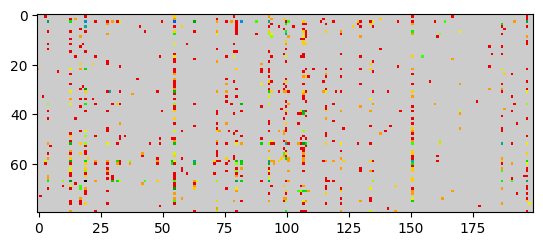

ModuleNotFoundError: No module named 'biomart'

In [15]:
#https://blog.ouseful.info/2021/09/30/a-simple-pattern-for-embedding-third-party-javascript-generated-graphics-in-jupyter-notebools/
#https://www.biorxiv.org/content/10.1101/2022.07.20.500854v1
#https://pubmed.ncbi.nlm.nih.gov/35625556/
# sort genes by perturbation so diagram makes a clear line from top left to bottom right
# solve the adata roblem -> cosine -> predict molecular response
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
category_indices = df.groupby('perturbation').apply(lambda x: x.index.tolist() )
most_cells = [category_indices[2][0] , category_indices[1][0]]

most_cell_indices = []
for i in most_cells:
    most_cell_indices.append(adata.obs.index.get_loc(i))
    
cell_group_indices = [df.index.get_loc(i) for i in most_cells]
similarities_list = []

for i in cell_group_indices:
    for j in cell_group_indices:
        A =  adata.X.getrow(i)
        A_sparse = adata.X.getrow(j)
        similarities = cosine_similarity(A_sparse, A)
        if similarities[0][0] > .5:
            similarities_list.append((i,j, similarities[0][0]))

    
    
print('pairwise dense output:\n {}\n'.format(similarities))

#also can output sparse matrices
similarities_sparse = cosine_similarity(A_sparse,dense_output=False)
similarities_list
numerical_columns = df.select_dtypes(include=['number']).columns

# Replace NaN values with 0 only in numerical columns
df[numerical_columns] = df[numerical_columns].fillna(0)

numerical_values = df.select_dtypes(include=[int, float]).values.tolist()
numerical_values
rowGeneExpression = defaultdict(int)

hv_genes = set(list(var_df[var_df['highly_variable'] == True].index))
normal_genes = (list(adata.var_names))

high_variance_columns = set([ i for i,val in enumerate(normal_genes) if val in hv_genes ])

numerical_columns = df.select_dtypes(include=['number']).columns

# Replace NaN values with 0 only in numerical columns
df[numerical_columns] = df[numerical_columns].fillna(0)

sums = []

column_averages = defaultdict(list)
rowGeneExpression = defaultdict(int)
rows, columns, vals = found
high_variance = set(high_variance_columns)
row_id = 0

embedLayer = []
for i in high_variance_columns:
        intermediate = []
        for i in adata.X.getcol(i).toarray():
            intermediate.append(i[0])
        embedLayer.append(intermediate)

mat_for_embed = np.random.rand(t_dep.shape[0], 200)
for key,col in enumerate(list(high_variance_columns)[:200]):
    m= adata.X.getcol(col)
    m = m.todense().tolist()
    for row,val in enumerate(m):
        mat_for_embed[row, key] = val[0]

a = mat_for_embed
plt.imshow(a[:80], cmap='nipy_spectral_r', interpolation='nearest')
plt.show()
#adata.X.A[0].nonzero()
#assert 4 == 24
#! pip install pybiomart
#! pip install gprofiler-official
import biomart
import pybiomart

mito_gene_names = sc.queries.mitochondrial_genes("hsapiens")
mito_ensembl_ids = sc.queries.mitochondrial_genes("hsapiens", attrname="ensembl_gene_id")
mito_gene_names_fly = sc.queries.mitochondrial_genes("dmelanogaster", chromosome="mitochondrion_genome")
import scanpy as sc
sc.queries.enrich(['KLF4', 'PAX5', 'SOX2', 'NANOG'], org="hsapiens")
sc.queries.enrich({'set1':['KLF4', 'PAX5'], 'set2':['SOX2', 'NANOG']}, org="hsapiens")
pbmcs = sc.datasets.pbmc68k_reduced()
sc.tl.rank_genes_groups(pbmcs, "bulk_labels")
sc.queries.enrich(pbmcs, "CD34+")
# pbmcs
category_indices = df.groupby('perturbation').apply(lambda x: x.index.tolist() )
df.index.get_loc('TACTTGACCCCN')
allRows = defaultdict(int)
categories = df['perturbation'].unique()
for i, group in enumerate(category_indices):
    for row in group:
        allRows[categories[i]] += 1
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "start_position", "end_position", "chromosome_name"],
    ).set_index("ensembl_gene_id")
adata.var[annot.columns] = annot

#adata.var[annot.columns]
annot.columns
#https://www.nature.com/articles/s41467-022-29268-7

       
df.groupby('perturbation')

categories
len(category_indices)

groupCellCounts = list(allRows.values())

nonZerosInColumn = list(allRows.values())

# for k,v in enumerate(groupCellCounts):
#     cellCount = nonZerosInColumn[k]
# # from ipywidgets import interact
# # trn_xs = [1,2,3,4,5]
# # conts=['Age', 'SibSp', 'Parch', 'LogFare',"Pclass"]


# # interact(nm=conts, split=15.5)(iscore);
#just get it working - improve it now
# num_input_channels: int, base_channel_size: int, latent_dim: int, act_fn: object = nn.GELU):

#print(tensor.shape)
#spongebob
#tensor
tensor.sum(1)
#simplify model, use a decoder, use another simple function on ('latent representation') to figure out stochastic relationships between columns and 
#mean, variance, 
# for latent_dim in [64, 128, 256, 384]:
#     model_ld, result_ld = train_cifar(latent_dim)
#     model_dict[latent_dim] = {"model": model_ld, "result": result_ld}
#     print(model_dict)
# model = model_dict[128]["model"]
# model = model_dict[256]["model"]    
import pylab
from Bio.SeqUtils import GC 
records = [len(rec) for rec in SeqIO.parse(filename, "fasta")] 
pylab.xlabel("Genes") 
pylab.ylabel("GC Percentage") 
pylab.grid()
pylab.hist(records,bins=5) 
gc = sorted(GC(rec.seq) for rec in SeqIO.parse(filename, "fasta"))
pylab.plot(gc) 
#https://marinegenomics.oist.jp/symb/viewer/download?project_id=37
#https://compeau.cbd.cmu.edu/teaching/great-ideas-in-computational-biology/
#https://pubs.acs.org/doi/10.1021/acssynbio.1c00329
from torch import nn
c_hid=16
latent_dim = 3
kernel_size = (1, 5)
finishDemo= nn.Sequential(
            nn.Conv2d(1, c_hid, kernel_size=(1, 5)),  # 32x32 => 16x16
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.Conv2d(c_hid, c_hid, kernel_size=kernel_size),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.Conv2d(c_hid, 2 * c_hid, kernel_size=kernel_size),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.Conv2d(2 * c_hid, 2 * c_hid, kernel_size=kernel_size),
            nn.LeakyReLU(), #L
            nn.Tanh(),
            nn.Conv2d(2 * c_hid, 1, kernel_size=kernel_size),  # 8x8 => 4x4
            #nn.Linear(180, 3)
).to('cuda:0')

# buf = numpy.fromfile( dataFile, dtype=np.uint8, count=16384, offset=offs)

nucleotides = []
# with open('./maize_pseudohap.fasta.gz', 'r') as f:
#     for line in f:
#         nucleotides.append(line)
def read_fasta(filename):
    """
    Read a FASTA file and return a dictionary with sequence headers as keys and sequences as values.
    """
    with open(filename, 'r') as f:
        sequences = {}
        header = None
        sequence = []
        count = 0
        for line in f:
            line = line.strip()  # Remove whitespace
            count+= 1
            print(line)
            if (count> 100):
                break
            if not line:  # Skip empty lines
                continue
            if line.startswith(">"):  # Header line
                if header:  # If there's already a previous header, save the sequence
                    sequences[header] = ''.join(sequence)
                    sequence = []
                header = line[1:]  # Exclude the ">" symbol
            else:  # Sequence line
                sequence.append(line)
        
        # Save the last sequence
        if header:
            sequences[header] = ''.join(sequence)
        
    return sequences


    
from Bio import SeqIO

filename = 'maize_pseudohap.fasta'
filename = 'symA3_37.fasta'
count = 0

seq = []
with open(filename, "r") as fasta_file:
    for record in SeqIO.parse(fasta_file, "fasta"):
        if count > 100: break
        #print(record.id)   # Prints the sequence header (identifier)
        seq.append(record.seq)  # Prints the sequence
        count += 1
s = seq[0]
s= str(s)
img = []
charToI = {
    'T': 0,
    'A': 1,
    'G': 2,
    'C': 3,
    'N': 4
}
for char in s:
    img.append(charToI[char])
import torch
tensor = torch.Tensor([[[img]]]).to('cuda:0')
#finishDemo(tensor)
s= str(s)
s
# plain_imgs = torch.zeros(4, 3, 32, 32)
# # Single color channel
# plain_imgs[1, 0] = 1
# # Checkboard pattern
# plain_imgs[2, :, :16, :16] = 1
# plain_imgs[2, :, 16:, 16:] = -1
# # Color progression
# xx, yy = torch.meshgrid(torch.linspace(-1, 1, 32), torch.linspace(-1, 1, 32))
# plain_imgs[3, 0, :, :] = xx
# plain_imgs[3, 1, :, :] = yy
# visualize_reconstructions(model_di#ct[256]["model"], plain_imgs)
#!pip install scvelo
import scvelo as scv
adata = scv.datasets.pancreas()

scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
scv.tl.velocity(adata)
#scv.pl.velocity_embedding_stream(adata, basis='umap')
# https://douglaslab.org/tutorials/files/Install-Cadnano-macOS-v4.pdf
# # # http# ! pip install biomart
# # mito_gene_names = sc.queries.mitochondrial_genes("hsapiens")
# # mito_ensembl_ids = sc.queries.mitochondrial_genes("hsapiens", attrname="ensembl_gene_id")
# # mito_gene_names_fly = sc.queries.mitochondrial_genes("dmelanogaster", chromosome="mitochondrion_genome")
# # import scanpy as sc
# # sc.queries.enrich(['KLF4', 'PAX5', 'SOX2', 'NANOG'], org="hsapiens")
# # sc.queries.enrich({'set1':['KLF4', 'PAX5'], 'set2':['SOX2', 'NANOG']}, org="hsapiens")
# # pbmcs = sc.datasets.pbmc68k_reduced()
# # sc.tl.rank_genes_groups(pbmcs, "bulk_labels")
# # sc.queries.enrich(pbmcs, "CD34+")
# # # pbmcs
# # category_indices = df.groupby('perturbation').apply(lambda x: x.index.tolist() )
# # df.index.get_loc('TACTTGACCCCN')
# # allRows = defaultdict(int)
# # categories = df['perturbation'].unique()
# # for i, group in enumerate(category_indices):
# #     for row in group:
# #         allRows[categories[i]] += 1
        
# # df.groupby('perturbation')

# # categories
# # len(category_indices)

# # groupCellCounts = list(allRows.values())

# # nonZerosInColumn = list(test.values())

# # for k,v in enumerate(groupCellCounts):
# #     cellCount = nonZerosInColumn[k]
# # # from ipywidgets import interact
# # # trn_xs = [1,2,3,4,5]
# # # conts=['Age', 'SibSp', 'Parch', 'LogFare',"Pclass"]

# #just get it working - improve it now
# from torch import nn
# import torch
# def conv(ni, nf, ks=3, stride=1, act=True):
#     res = nn.Conv1d(ni, nf, stride=stride, kernel_size=ks, padding=ks//2)
#     if act: res = nn.Sequential(res, nn.ReLU())
#     return res

# def deconv(ni, nf, ks=3, act=True):
#     layers = [
#     #    nn.UpsamplingNearest2d(scale_factor=2),
#               nn.Conv2d(ni, nf, stride=1, kernel_size=ks, padding=ks//2)
#     ]
#     if act: layers.append(nn.ReLU())
#     return nn.Sequential(*layers)

# #data /= torch.max(data , 1)
# #sort them by cluster and back
# finishDemoBy6 = nn.Sequential(
#     #nn.RNN(200, 200),
#     torch.nn.Linear(200, 200),
#     nn.Tanhshrink(),
#     #nn.PairwiseDistance(p=2),
#     conv(5905,5905, 3),       
#     nn.AvgPool1d(101, stride=1),
#     conv(5905,5905),
#     nn.BatchNorm1d(100),
#     nn.AvgPool1d(51, stride=1),
#     #conv(5905,5905), 
#     nn.AvgPool1d(48, stride=1),
#     nn.Sigmoid()
# ).to('cuda:0')

# num_input_channels = 3
# c_hid=16
# latent_dim = 64
# finishDemoBy6= nn.Sequential(
#         nn.Conv2d(1, c_hid, kernel_size=2, padding=1, stride=2),  # 32x32 => 16x16
#            nn.Conv2d(c_hid, c_hid, kernel_size=3, padding=1),
#            nn.Conv2d(c_hid, 2 * c_hid, kernel_size=3, padding=1, stride=2),  # 16x16 => 8x8
#            nn.Conv2d(2 * c_hid, 2 * c_hid, kernel_size=3, padding=1),
#            nn.Conv2d(2 * c_hid, 3, kernel_size=3, padding=0, stride=1),  # 8x8 => 4x4
#            #nn.Flatten(),  # Image grid to single feature vector
# #             nn.Linear(2 * 16 * c_hid, 3),
# )

# opt = optim.SGD(finishDemoBy6.parameters(), lr=0.01)
# loss_function2 = torch.nn.MSELoss()
# opt = optim.SGD(finishDemoBy6.parameters(), lr=0.01)
# loss_function2 = torch.nn.MSELoss()
# data = torch.Tensor(mat_for_embed).cuda()
# for i in range(50):
#     encodedOutput = (finishDemoBy6(data))
# #     loss = loss_function2(encodedOutput.sum(1), t_dep.cuda())
# #     opt.zero_grad()  # 3
# #     loss.backward()
#     opt.step()
# encodedOutput.to('cuda:0')
# encodedOutput
# Z = adata.X.A
# encodedOutput
# https://www.frontiersin.org/articles/10.3389/fpls.2023.1091588/full

from openmm.app import *
from openmm import *
from openmm.unit import *

print('Loading...')
pdb = PDBFile('./data_sets/AF-A0A2W7I3V2-F1-model_v4.pdb')
forcefield = ForceField('amber99sb.xml', 'tip3p.xml')
modeller = Modeller(pdb.topology, pdb.positions)
print('Adding hydrogens...')
modeller.addHydrogens(forcefield)
print('Adding solvent...')
modeller.addSolvent(forcefield, model='tip3p', padding=1*nanometer)
print('Minimizing...')
system = forcefield.createSystem(modeller.topology, nonbondedMethod=PME)
integrator = VerletIntegrator(0.501*picoseconds)
simulation = Simulation(modeller.topology, system, integrator)
simulation.context.setPositions(modeller.positions)
simulation.minimizeEnergy(maxIterations=100)
print('Saving...')
positions = simulation.context.getState(getPositions=True).getPositions()
PDBFile.writeFile(simulation.topology, positions, open('output.pdb', 'w'))
print('Done')

#https://openstructure.org/promod3/3.3/gettingstarted/
#http://njohner.github.io/ost_pymodules/align_traj_on_density.html

In [ ]:
simulation.topology
modeller.topology
#pdb.topology
# import MDAnalysis as mda
# u = mda.Universe('./templates/vite-project/public/graphite.pdb')
# from py3dmol import vizinterfaces as p3d
# viz = p3d.MdaViz(u)
# viz.make_animation()
# viz.animate()
# protein = u.select_atoms('not resname HOH')
# pviz = p3d.MdaViz(protein,width='400px',height='400px')
# pviz.make_animation()
#blue biotech
from sgrna_designer.design import design_sgrna_tiling_library

target_transcripts = ['ENST00000381577', 'ENST00000644969'] # [PDL1, BRAF]
#how do you share a datamodel between python and javascript
#goal increase biofuel yield of algae -> make this super easy
#as a user/scientist/child - i would like to buy algae, plants and so on that are slightly modified in cool ways
#as a scientist - i would like to modify genes in as custom a way as possible to support industrial workflows in blue biotech = algae + fish

#purple popcorn
#purple trees
#better algae

#LX95_01242
#for each organism
#list a dropdrown of changes
genes = {
    'algae': {'property': 'glowing', 'name': 'asdfasdf'}
}
#data base for sequences for each organism
#each organism has
    # genome
    # potential edits - genes
    #lots of this seems to be just lots of joins - like AF - 500gb of genetic databases
    #some of this seems to be "computational chemistry??" - how different molecules fit together 
    #other part would be good ui + random other shit thats probably easy to find through lots of iteration and talking to people
def queryDataBase(gene):
    gene = 'PZW41561.1'
    url = 'https://www.ebi.ac.uk/ebisearch/search?query=${gene}&requestFrom=ebi_index&db=allebi'
    search_results = request(url)
    page = request(search_results[0])
    fastas = request(page.find('link:href="fasta"'))
    return fasta

def findCorrectPlaceToPutGeneInNucleus():
    #use a libary 
    #do sequence alignmnet
    #just put it at the end of two sequences between the telomereres in a gene that isnt activated
    #or replace with a gene you dont want
    #use some sort of routing building block viusalization on the client 
    #let people configure and play with different DNA configurations as if they were legos
    #3d viuslaizatioon of all different possibiliies
    #show different results of dna
    pass 

def designSGRNA(prevSeq, nextSeq):
    pass
#using the existing genome on the organism, find a good place to put the gene - based on genomics data and some sort of fancy simulation                                              
#TBD - add a prompt to synthesize or look up a protein from another organism and use an LLM to magic that
#given a protein or enzyme
#look up the gene
#with the gene, look up the fasta
#knowing what the intended new structure is of the genome, design an SGRNA to clip and modify the genome of the algae
pdb = PDBFile('./data_sets/AF-A0A2W7I3V2-F1-model_v4.pdb')

#LX95_01242
#https://www.ebi.ac.uk/ena/browser/api/fasta/PZW41561.1?download=true
from pypdb.clients.search.search_client import perform_search_with_graph
from pypdb.clients.search.search_client import ReturnType
from pypdb.clients.search.search_client import QueryGroup, LogicalOperator
from pypdb.clients.search.operators import text_operators

# SearchOperator associated with structures with under 4 Angstroms of resolution
under_4A_resolution_operator = text_operators.ComparisonOperator(
       value=4,
       attribute="rcsb_entry_info.resolution_combined",
       comparison_type=text_operators.ComparisonType.GREATER)

# SearchOperator associated with entities containing 'Mus musculus' lineage
is_mus_operator = text_operators.ExactMatchOperator(
            value="LX95_01242",
            attribute="rcsb_entity_source_organism.taxonomy_lineage.name")

# SearchOperator associated with entities containing 'Homo sapiens' lineage
is_human_operator = text_operators.ExactMatchOperator(
            value="Homo sapiens",
            attribute="rcsb_entity_source_organism.taxonomy_lineage.name")

# QueryGroup associated with being either human or `Mus musculus`
is_human_or_mus_group = QueryGroup(
    queries = [is_mus_operator, is_human_operator],
    logical_operator = LogicalOperator.OR
)

# QueryGroup associated with being ((Human OR Mus) AND (Under 4 Angstroms))
is_under_4A_and_human_or_mus_group = QueryGroup(
    queries = [is_human_or_mus_group, under_4A_resolution_operator],
    logical_operator = LogicalOperator.AND
)

return_type = ReturnType.ENTRY

results = perform_search_with_graph(
  query_object=is_under_4A_and_human_or_mus_group,
  return_type=return_type)
print("\n", results[:10]) # Huzzah

In [ ]:
import random
import numpy as np
import pandas as pd
import scanpy as sc
import muon as mu
import muon.atac as ac
import muon.prot as pt
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

#mdata = mu.MuData({'rna': adata_rna, 'atac': adata_atac})
mdata = mu.read_10x_h5("filtered_feature_bc_matrix.h5")
















































from Bio import SeqIO

filename = 'maize_pseudohap.fasta'
filename = 'symA3_37.fasta'

import json
seq = []
def hasGenome(filename):
    count = 0
    with open(filename, "r") as fasta_file:
        for record in SeqIO.parse(fasta_file, "fasta"):
            if count > 10: break
            #print(record.id)   # Prints the sequence header (identifier)
            seq.append(str(record.seq))  # Prints the sequence
            count += 1
        with open('/home/awahab/llm-testing/templates/vite-project/public/kmers.json', 'w') as writable:
            json.dump(seq, writable)
            writable.close()
        print('writing to file ' + './templates/vite-project/public/kmers.json')
hasGenome(filename)
from Bio import Align
aligner = Align.PairwiseAligner()
print(aligner)

from Bio.Align.Applications import ClustalwCommandline
alignments = pairwise2.align.globalxx(seq1, seq2) 


align = AlignIO.read("/path/to/biopython/sample/opuntia.aln", "clustal")
print(align)
# @app1.route('/status', methods=['GET'])
# def a_live():
#     print('shit', hasGenome(filename)[0])
#     return jsonify(hasGenome(filename))

# @app1.route('/predict', methods=['GET'])
# def predict():
#     demo=random.randint(2000, 5000)    
#     return str(demo)

# app1.run(port=5000)  # run app in debug mode on port 5000


#actually make it so when user requests 

# i want this tree to be purple

# create a dropdrown of other colors it can be 
#dont have a prompt -> just creates toggles for shit that peple want 
# actually changes the shader to be those colors ??!??!?! ?! 

In [ ]:
# mdata.obs["sample"] = s
# mdata.obs["well"] = w

# mdata = mu.read_10x_h5(
#     get_h5_file(data_dir, s, w)
# )

# mdata.update()
# mdata.var_names_make_unique()

# plt.rcParams['figure.dpi'] = 100

# mu.pl.embedding(mdata, basis="X_wnn_umap", color=list(map(
#     lambda x: "prot:" + x,
#     [
#         "CD4", "CD45RA", "CD45RO",  # CD4 T cells
#         "CD8a",                     # CD8 T cells
#         "KLRG1",                    # NK cells
#         "CD14", "CD16",             # monocytes
#         "CD19", "CD21", "IgD",      # B cells
#     ]
# )))

# #https://support.10xgenomics.com/single-cell-multiome-atac-gex/datasets/1.0.0/pbmc_granulocyte_sorted_10k
# #https://support.10xgenomics.com/single-cell-gene-expression/datasets/3.0.2/5k_pbmc_protein_v3
# import os

# import muon as mu
# import muon.atac as ac
# import muon.prot as pt

# import matplotlib
# from matplotlib import pyplot as plt

# from glob import glob

# data_dir = "./"

# for file in _(f"{data_dir}/GSM5123951*"):
#     print(file)
    
# get_h5_file = lambda root, s, w: f"{root}/{s}_X066-MP0C1{w}_leukopak_perm-cells_tea_200M_cellranger-arc_filtered_feature_bc_matrix.h5"


# meta = {}
# for file in glob(f"{data_dir}/GSM5123951*"):
#     tokens = os.path.basename(file).split("_")
#     meta[
#         tokens[0]       # GSM5123951
#     ] = tokens[1][-2:]  # W3

# meta
# s, w = list(meta.items())[0]


# def reArrangingOrigamiBlocks():
#     return 'aligning em microscopy images'
#     return 'particle images'

# import mudatasets
# mdata = mudatasets.load("brain3k_multiome", full=True)
# mdata.var_names_make_unique()
import mudatasets
mdata = mudatasets.load("brain3k_multiome", full=True)
#mdata.var_names_make_unique()
mdata
#https://cpa-tools.readthedocs.io/en/latest/tutorials/GSM.html
#https://thedataquarry.com/posts/vector-db-4/
#invent something in blue biotech
#https://genome.jgi.doe.gov/portal/pages/dynamicOrganismDownload.jsf?organism=Chlremi1
#design fusion of two proteins
#https://observablehq.com/d/124e11318fe98788
#canu -d SLA-04_q100_Canu_assembly -p SLA-04 genomeSize=55m -nanopore-raw /home/calvinc/SLA-04_fast5_original/fastq_skipped+passed/*.fastq
#https://www.google.com/search?q=algae+gneome+.fasta&sca_esv=558593241&sxsrf=AB5stBilP6j3p89gvHZ0GXMjNzQtcR3Q-A%3A1692557692181&ei=fGHiZMHPCoKrqtsPo7GTkAM&ved=0ahUKEwjB_YPg9OuAAxWClWoFHaPYBDIQ4dUDCBE&uact=5&oq=algae+gneome+.fasta&gs_lp=Egxnd3Mtd2l6LXNlcnAiE2FsZ2FlIGduZW9tZSAuZmFzdGEyBxAhGKABGApI_gpQJ1jECHAAeAKQAQCYAZUBoAHHBaoBAzQuM7gBA8gBAPgBAcICBBAAGEfCAgcQABgNGIAEwgIGEAAYFhgewgIIEAAYFhgeGA_CAgUQIRigAeIDBBgAIEGIBgGQBgU&sclient=gws-wiz-serp#ip=1
#https://chempert.uni.lu/transcriptionalresponse/RID16890

#!wget https://marinegenomics.oist.jp/symb/download/symA3_37.fasta.gz
# !ls | grep symA3
# !gunzip symA3_37.fasta.gz
#run experiments

#convolutions on nucoleotide basepairs -> lookign for patterns 
# make algae do more cool stuff -> increase yield, disease resitant, less water, faster thing, longer lifespan  
#https://www.kaggle.com/competitions/open-problems-multimodal/data



#4 step pipeline -> each step is programmable -> different workflows -> this one is for a different lab and a different problem
#do a different problem -> crispr for plants, or make it generalizable across lots of workflows 
#
#1 day
# assemble routing structure for RNA to connect to
#s guide rna
#ribosome viewer
#transcriptome design

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results
adata = sc.read_10x_mtx(
    'data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)      
sc.pp.highly_variable_genes(adata, 
                                layer=None, 
                                n_top_genes=200, 
                                min_disp=0.5, 
                                max_disp=1, 
                                min_mean=0.0125, 
                                max_mean=3, 
                                span=0.3, 
                                n_bins=20, 
                                flavor='seurat_v3', 
                                subset=False, 
                                inplace=True, 
                                batch_key=None, 
                                check_values=True)

In [ ]:
# import os
# os.chdir('../')
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.simplefilter(action='ignore', category=UserWarning)


# import scanpy as sc
# import torch
# import scarches as sca
# from scarches.dataset.trvae.data_handling import remove_sparsity
# import matplotlib.pyplot as plt
# import numpy as np
# import gdown

# from absl import flags
# flags.DEFINE_string("flags", None, "flag for host IP address")

# sc.settings.set_figure_params(dpi=200, frameon=False)
# sc.set_figure_params(dpi=200)
# sc.set_figure_params(figsize=(4, 4))
# torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

# target_conditions = ["10X"]
# source_adata = adata[~adata.obs.study.isin(target_conditions)].copy()
# target_adata = adata[adata.obs.study.isin(target_conditions)].copy()
# print(source_adata)
# print(target_adata)

# sca.models.SCVI.setup_anndata(source_adata, batch_key="batch")

# vae = sca.models.SCVI(
#     source_adata,
#     n_layers=2,
#     encode_covariates=True,
#     deeply_inject_covariates=False,
#     use_layer_norm="both",
#     use_batch_norm="none",
# )

# early_stopping_kwargs = {
#     "early_stopping_metric": "elbo",
#     "save_best_state_metric": "elbo",
#     "patience": 10,
#     "threshold": 0,
#     "reduce_lr_on_plateau": True,
#     "lr_patience": 8,
#     "lr_factor": 0.1,
# }
# vae.train(n_epochs=500, frequency=1, early_stopping_kwargs=early_stopping_kwargs)


# reference_latent = sc.AnnData(vae.get_latent_representation())
# reference_latent.obs["cell_type"] = source_adata.obs["final_annotation"].tolist()
# reference_latent.obs["batch"] = source_adata.obs["batch"].tolist()
# sc.pp.neighbors(reference_latent, n_neighbors=8)
# sc.tl.leiden(reference_latent)
# sc.tl.umap(reference_latent)
# sc.pl.umap(reference_latent,
#            color=['batch', 'cell_type'],
#            frameon=False,
#            wspace=0.6,
#            )

# ref_path = 'ref_model/'
# vae.save(ref_path, overwrite=True)

# model = sca.models.SCVI.load_query_data(
#     target_adata,
#     ref_path,
#     freeze_dropout = True,
# )

# query_latent = sc.AnnData(model.get_latent_representation())
# query_latent.obs['cell_type'] = target_adata.obs["final_annotation"].tolist()
# query_latent.obs['batch'] = target_adata.obs["batch"].tolist()

# model.train(n_epochs=500, frequency=1, early_stopping_kwargs=early_stopping_kwargs, weight_decay=0)
# sc.pp.neighbors(query_latent)
# sc.tl.leiden(query_latent)
# sc.tl.umap(query_latent)
# plt.figure()
# sc.pl.umap(
#     query_latent,
#     color=["batch", "cell_type"],
#     frameon=False,
#     wspace=0.6,
# )

# surgery_path = 'surgery_model'
# model.save(surgery_path, overwrite=True)

#pathing errors -> conda installed with sudo

# from absl import flags
# FLAGS = flags.FLAGS

# from absl import flags
# from absl.flags import FLAGS

# flags.DEFINE_string('dataroot',"D:\College",'path to root folder of dataset')


# import scarches as sca
#reinstall. abs